In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/Temp_Provincias.csv', sep=';', decimal='.')

In [4]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,01/01/2018,Madrid,11.6,3.6
1,02/01/2018,Madrid,13.4,7.5
2,03/01/2018,Madrid,13.5,7.6
3,04/01/2018,Madrid,13.7,7.8
4,05/01/2018,Madrid,11.5,5.8


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,2018-01-01,Madrid,11.6,3.6
1,2018-01-02,Madrid,13.4,7.5
2,2018-01-03,Madrid,13.5,7.6
3,2018-01-04,Madrid,13.7,7.8
4,2018-01-05,Madrid,11.5,5.8


In [8]:
df.columns

Index(['FECHA', 'Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [9]:
df = df.set_index('FECHA')
df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [10]:
barcelona_df = df[df["Provincia"] == "Barcelona"]
#df[valencia_df]

In [11]:
barcelona_df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Barcelona,15.5,10.2
2018-01-02,Barcelona,17.8,11.4
2018-01-03,Barcelona,21.8,14.0
2018-01-04,Barcelona,21.9,16.4
2018-01-05,Barcelona,19.2,13.7


In [12]:
barcelona_df.columns

Index(['Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [13]:
barcelona_df['Temp_Media'] = barcelona_df[['T. Máxima','T.Mínima']].mean(axis=1)
barcelona_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Barcelona,15.5,10.2,12.85
2018-01-02,Barcelona,17.8,11.4,14.60
2018-01-03,Barcelona,21.8,14.0,17.90
2018-01-04,Barcelona,21.9,16.4,19.15
2018-01-05,Barcelona,19.2,13.7,16.45


In [14]:
barcelona_df.head()

,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Barcelona,15.5,10.2,12.85
2018-01-02,Barcelona,17.8,11.4,14.60
2018-01-03,Barcelona,21.8,14.0,17.90
2018-01-04,Barcelona,21.9,16.4,19.15
2018-01-05,Barcelona,19.2,13.7,16.45


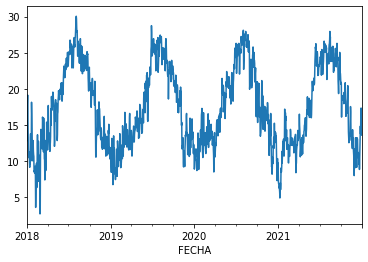

In [15]:
barcelona_df['Temp_Media'].plot()

In [16]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':barcelona_df.index,'y':barcelona_df.Temp_Media})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,12.85
2018-01-02,2018-01-02,14.60
2018-01-03,2018-01-03,17.90
2018-01-04,2018-01-04,19.15
2018-01-05,2018-01-05,16.45


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


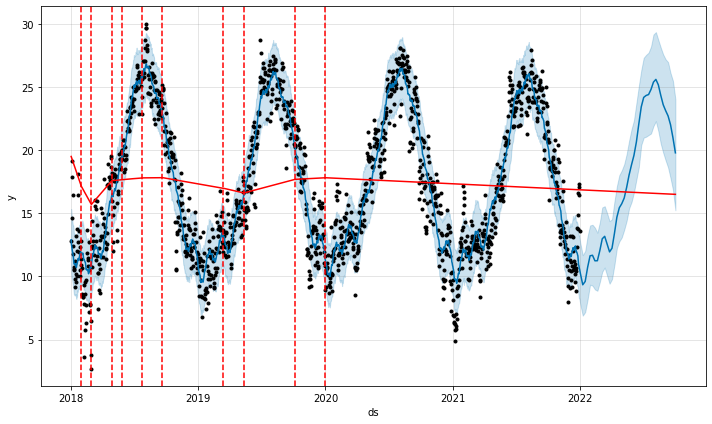

In [21]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=40, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [22]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,12.910962,10.490125,15.354486
1,2018-01-02,12.495986,9.965304,14.871275
2,2018-01-03,12.348746,9.863588,14.714493
3,2018-01-04,12.118747,9.758099,14.565891
4,2018-01-05,11.972711,9.563024,14.251538


In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1496,2022-09-04,16.551747,19.204766,27.221849,13.475731,19.745622,6.600472,6.600472,6.600472,0.161109,0.161109,0.161109,6.439363,6.439363,6.439363,0.0,0.0,0.0,23.152219
1497,2022-09-11,16.542580,18.644151,26.997356,13.332543,19.894264,6.190826,6.190826,6.190826,0.161109,0.161109,0.161109,6.029718,6.029718,6.029718,0.0,0.0,0.0,22.733407
1498,2022-09-18,16.533413,17.805767,26.139499,13.135576,19.988026,5.507864,5.507864,5.507864,0.161109,0.161109,0.161109,5.346755,5.346755,5.346755,0.0,0.0,0.0,22.041276
1499,2022-09-25,16.524245,16.885273,25.514912,12.978525,20.117692,4.478225,4.478225,4.478225,0.161109,0.161109,0.161109,4.317117,4.317117,4.317117,0.0,0.0,0.0,21.002471
1500,2022-10-02,16.515078,15.252989,24.066775,12.854057,20.221286,3.291034,3.291034,3.291034,0.161109,0.161109,0.161109,3.129926,3.129926,3.129926,0.0,0.0,0.0,19.806112


In [24]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('temp_barcelona.csv',  index=False, sep=";", decimal=",")